<a href="https://colab.research.google.com/github/yoshinaga2904/Bootcamp-Alura/blob/main/Fabio_Yoshinaga_Projeto_modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Apresentação:

---
Olá Cientistas!

Pretendo com as aulas do modulo 1 - Bootcamp Data Science Aplicado, aprender as tecnicas utilizadas por um cientista de dados para os tratamentos de dados e teorias aplicadas. Vou analisar os dados da fonte citada abaixo e demonstrar algumas hipóteses observadas referente a epidemia Covid 19. Então vamos lá... 


# Base de estudo:

---
Pesquisa:

Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO.

*fonte: https://github.com/turicas/covid19-br/blob/master/api.md#casos*


# Hipótese:

####1 - analisar quantidade de casos Registrados de covid 19 por estados UF;

####2 - analisar quantidade de casos confirmados de covid 19 por estados UF; 

####3 - analisar quantidade de mortes pela covid 19 por estados UF; 

####4 - analisar taxa de mortalidade pela covid 19 por estados UF; 

####5 - analisar quantidade de casos confirmados pelo covid 19, com a estimativa populacional segundo o IBGE por estados UF; 

####6 - analisar quantidade de mortes pelo covid 19, com a estimativa populacional segundo o IBGE por estados UF

# Nova seção

# Bibliotecas:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Análise dos Dados: 

# Documentação da tabela:
## Colunas:

1. date: data de coleta dos dados no formato YYYY-MM-DD.

2. state: sigla da unidade federativa, exemplo: SP.

3. city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).

4. place_type: tipo de local que esse registro descreve, pode ser city ou state.

5. order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.

6. is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).

7. city_ibge_code: código IBGE do local.

8. confirmed: número de casos confirmados.

9. deaths: número de mortes.

10. estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).

11. estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.

12. confirmed_per_100k_inhabitants: número de casos 
confirmados por 100.000 habitantes (baseado em estimated_population).

13. death_rate: taxa de mortalidade (mortes / confirmados).

#Arquivo - Brasil IO

In [4]:
#lendo arquivo do Brasil.IO
caso_brasil_io = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bootcamp Alura Data Science/caso.csv')
caso_brasil_io.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [5]:
#Verificando quantidade de linhas e colunas no arquivo Brasil.IO
caso_brasil_io.shape
print(f'Temos no arquivo de dados do Brasil IO um total de {caso_brasil_io.shape[0]} linhas e {caso_brasil_io.shape[1]} colunas')

Temos no arquivo de dados do Brasil IO um total de 936870 linhas e 13 colunas


In [6]:
#informações gerais e tipo de variáveis no arquivo Brasil.IO
caso_brasil_io.info()
print('Existem campos com valores vazios, e a princípio não farei nenhum tratamento, para os dados vazios. Conforme a necessidade traterei no decorrer da análise.')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

# 1 - analisar quantidade de casos Registrados de covid 19 por estados UF;

In [7]:
#Separando a quantidade de registros para casos de covid 19 por estados UF
frequencia = caso_brasil_io['state'].value_counts()

#Verificando o percentual de registros dos casos de covid 19 por estados UF
percentual = caso_brasil_io['state'].value_counts(normalize=True).round(4)*100

#Criando um DataFrame com os valores de frequência e percentual dos casos por estados UF
dados = {'Frequência de casos Registrados':frequencia, 'Porcentagem %':percentual}
casos_registrados = pd.DataFrame(data=dados)
casos_registrados

,Frequência de casos Registrados,Porcentagem %
MG,129839,13.86
SP,114897,12.26
RS,80731,8.62
BA,72566,7.75
PR,62364,6.66
SC,53179,5.68
GO,41065,4.38
MA,41062,4.38
PB,38848,4.15
PI,38160,4.07


<function matplotlib.pyplot.show>

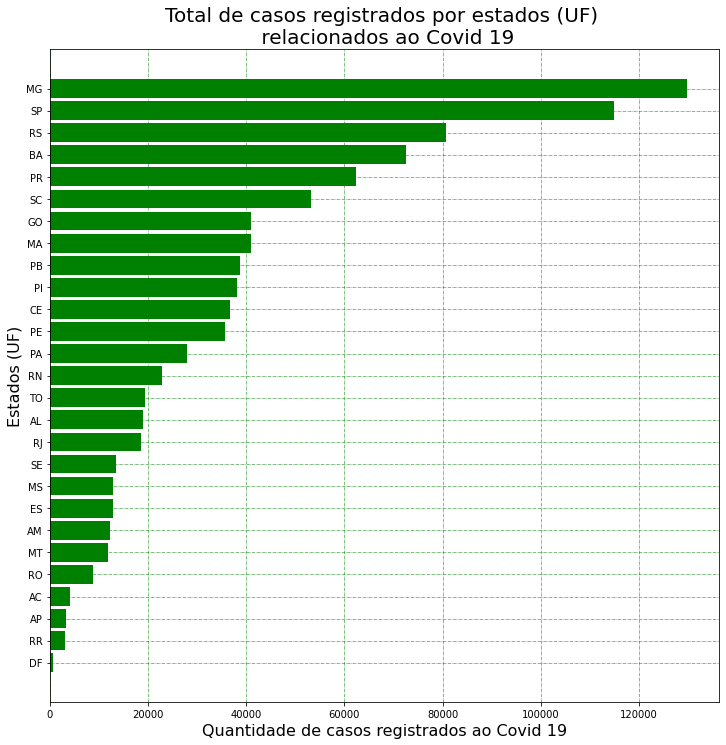

In [8]:
#Criando um gráfico
plt.figure(figsize=(12, 12))

#armazenando valores de frequências para construir o gráfico - eixo x
casos_registrados.sort_values(by='Frequência de casos Registrados', ascending=True, inplace=True)
frequencia = casos_registrados['Frequência de casos Registrados']

#armazenando valores dos estados UF para construir o gráfico - eixo y
UF = casos_registrados.index

#Chamando método barh do matplotlib, para construir o gráfico de barras horizontais
plt.barh(UF, frequencia, height=0.85, color='green')

#Criando um título
plt.title('Total de casos registrados por estados (UF) \n relacionados ao Covid 19', fontsize = 20)

#Nomeando o eixo y
plt.ylabel('Estados (UF)', fontsize = 16)

#Nomeando o eixo x
plt.xlabel('Quantidade de casos registrados ao Covid 19', fontsize = 16)

#grid para orientação
plt.grid(color='g', linestyle='-.', linewidth=0.5)

plt.show

Os dados apresentam que a Unidade da Federação com maior frequência é o estado de Minas Gerais com 129.839 registros representando um percentual de 13.86% dos registros realizados em todo o pais, para casos de Covid 19. Interessante que Minas Gerais é o segundo estado mais populoso do pais, com 21.292.666 habitantes segundo dados do IBGE em 2020. São Paulo que é o estado mais populoso do pais com 46.289.333 habitantes segundo o IBGE em 2020, ficou em segundo lugar nos casos registrados referente ao Covid 19.
Existem diversos fatores que contribuem para isso, desde cuidados preventivos que a população adotou, histórico hospitalar, idade da população, aspectos culturais, regionais, miscigenação racial, e diversos outros fatores. 

# 2 - analisar quantidade de casos confirmados de covid 19 por estados UF;

In [9]:
caso_brasil_io.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [38]:
#quantidade de casos confirmados por estados UF
casos_confirmados = caso_brasil_io[['state','confirmed']]

#agrupando por estados UF e fazendo o somatório dos casos confirmados
casos_confirmados = casos_confirmados.groupby(by=['state']).sum()

#ordenando os estados UF pela quantidade de casos confirmados em ordem decrescente 
casos_confirmados = casos_confirmados.sort_values(by=['confirmed'], ascending=False)

#criando um index e resetando o index state
casos_confirmados.reset_index(inplace=True)

casos_confirmados

,state,confirmed
0,SP,205850431
1,BA,64286325
2,CE,59887505
3,RJ,59671484
4,PA,54681352
5,MG,53754071
6,MA,42463978
7,SC,40554670
8,DF,40498155
9,GO,37484709


<function matplotlib.pyplot.show>

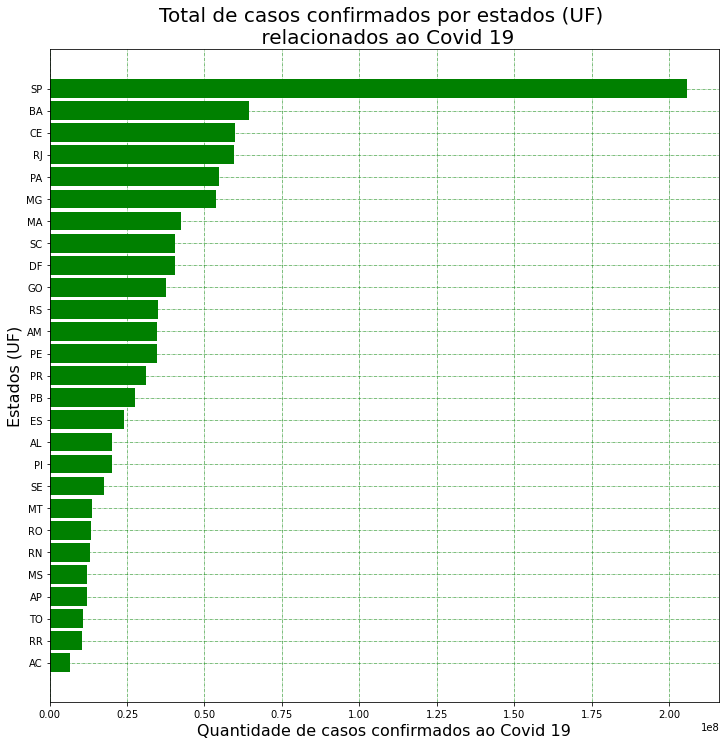

In [47]:
#Criando um gráfico
plt.figure(figsize=(12, 12))

#armazenando quantidade de confirmados para construir o gráfico - eixo x
casos_confirmados.sort_values(by='confirmed', ascending=True, inplace=True)
confirmados = casos_confirmados['confirmed']

#armazenando valores dos estados UF para construir o gráfico - eixo y
UF = casos_confirmados['state']

#Chamando método barh do matplotlib, para construir o gráfico de barras horizontais
plt.barh(UF, confirmados, height=0.85, color='green')

#Criando um título
plt.title('Total de casos confirmados por estados (UF) \n relacionados ao Covid 19', fontsize = 20)

#Nomeando o eixo y
plt.ylabel('Estados (UF)', fontsize = 16)

#Nomeando o eixo x
plt.xlabel('Quantidade de casos confirmados ao Covid 19', fontsize = 16)

#grid para orientação
plt.grid(color='g', linestyle='-.', linewidth=0.5)

plt.show